# 1- data analyse

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
xfile = h5py.File('./data/X_train.h5', 'r')

Text(0, 0.5, 'dx')

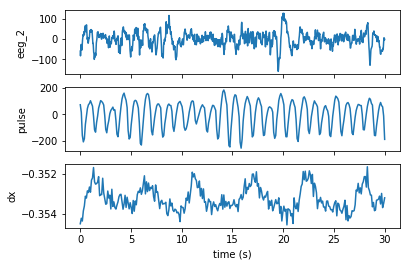

In [12]:
t5 = np.linspace(0, 30, 1500)
t1 = np.linspace(0, 30, 300)
sujet = np.random.randint(24688)

eeg = xfile['eeg_2'][sujet]
pls = xfile['pulse'][sujet]
dx = xfile['x'][sujet]

ax1 = plt.subplot(3, 1, 1)
plt.plot(t5, eeg)
plt.ylabel('eeg_2')
plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = plt.subplot(3, 1, 2)
plt.plot(t1, pls)
plt.ylabel('pulse')
plt.setp(ax2.get_xticklabels(), visible=False)


plt.subplot(3, 1, 3)
plt.plot(t1, dx)
plt.xlabel('time (s)')
plt.ylabel('dx')

In [32]:
def LMM(x, k=10):
    N = len(x)
    y = np.zeros(N)
    for i in range(N):
        Nmi = min(N, i+k)
        Imi = Nmi - k
        y[i] = np.mean(np.hstack([x[i:Nmi], x[Imi:i]]))
    return y

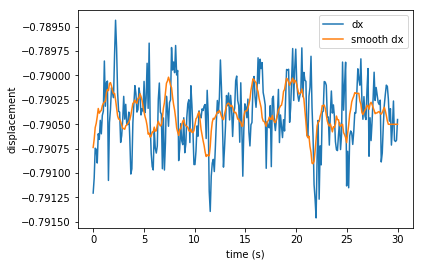

In [43]:
sujet = np.random.randint(24688)

dx = xfile['x'][sujet]
sdx = LMM(dx)

plt.plot(t1, dx, label='dx')
plt.plot(t1, sdx, label='smooth dx')
plt.xlabel('time (s)')
plt.ylabel('displacement')
plt.legend()

In [44]:
from scipy.signal import butter, lfilter

class BandFilter(object):
	def __init__(self, lowc, highc):
		super(BandFilter, self).__init__()
		self.lowc = lowc/2.0 # bande inférieure
		self.highc = highc/2.0 # bande supérieure
	
	def run(self, x, fs, order=4):
		nyq = 0.5 * fs
		low = self.lowc / nyq
		high = self.highc / nyq
		b, a = butter(order, [low, high], btype='band')

		y = lfilter(b, a, x)
		return y

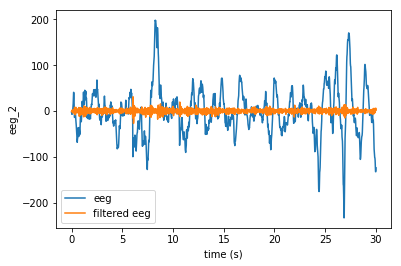

In [54]:
t5 = np.linspace(0, 30, 1500)
t1 = np.linspace(0, 30, 300)
sujet = np.random.randint(24688)

eeg = xfile['eeg_2'][sujet]
flt = BandFilter(15, 50-10**-7)
feeg = flt.run(eeg, 50)

plt.plot(t5, eeg, label='eeg')
plt.plot(t5, feeg, label='filtered eeg')
plt.xlabel('time (s)')
plt.ylabel('eeg_2')
plt.legend()